In [117]:
%matplotlib inline
import autograd.numpy as np
import autograd.numpy.random as npr
from autograd import grad, jacobian
from scipy.misc import logsumexp
from scipy.special import gammaln
from scipy.linalg import norm
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")
seaborn.set_context("talk")
import cPickle
print npr.randn(10)
print np.exp(gammaln(6))
np.random.multinomial(1, [1/6.]*6, size=1)

[-0.9335472   0.43167407 -2.09418572  1.61271291 -1.71797939  0.33680976
  0.97002976  0.85690384 -1.09563123  0.58473811]
120.0


array([[0, 0, 0, 0, 0, 1]])

In [274]:

dictionary=cPickle.load( open( "../save4.p", "rb" ) )
print 5

for e in dictionary:
    print e




5
posteriors
elbos
approx_z
log_evidences
var_params
x_true_all
dists
z_true_all
mu_gmm_all


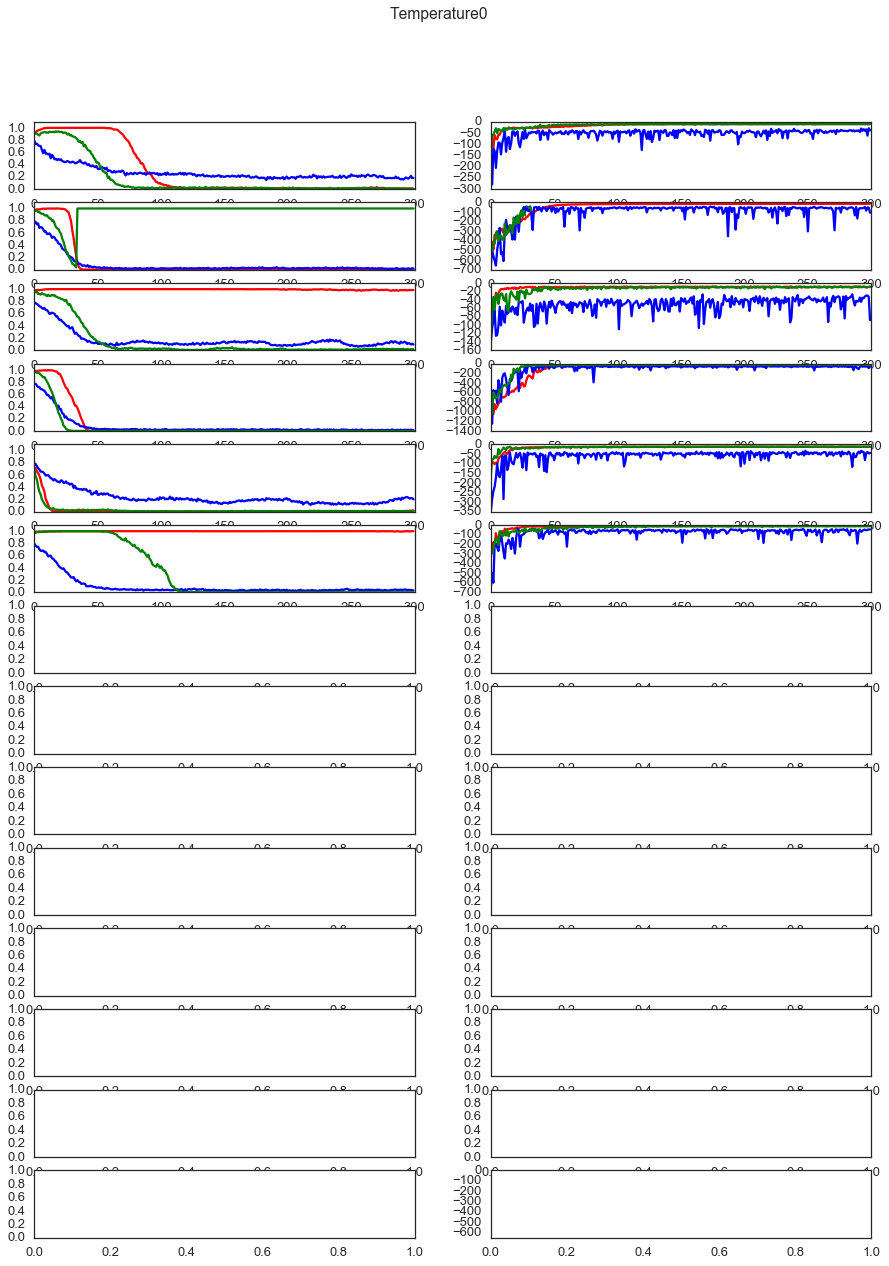

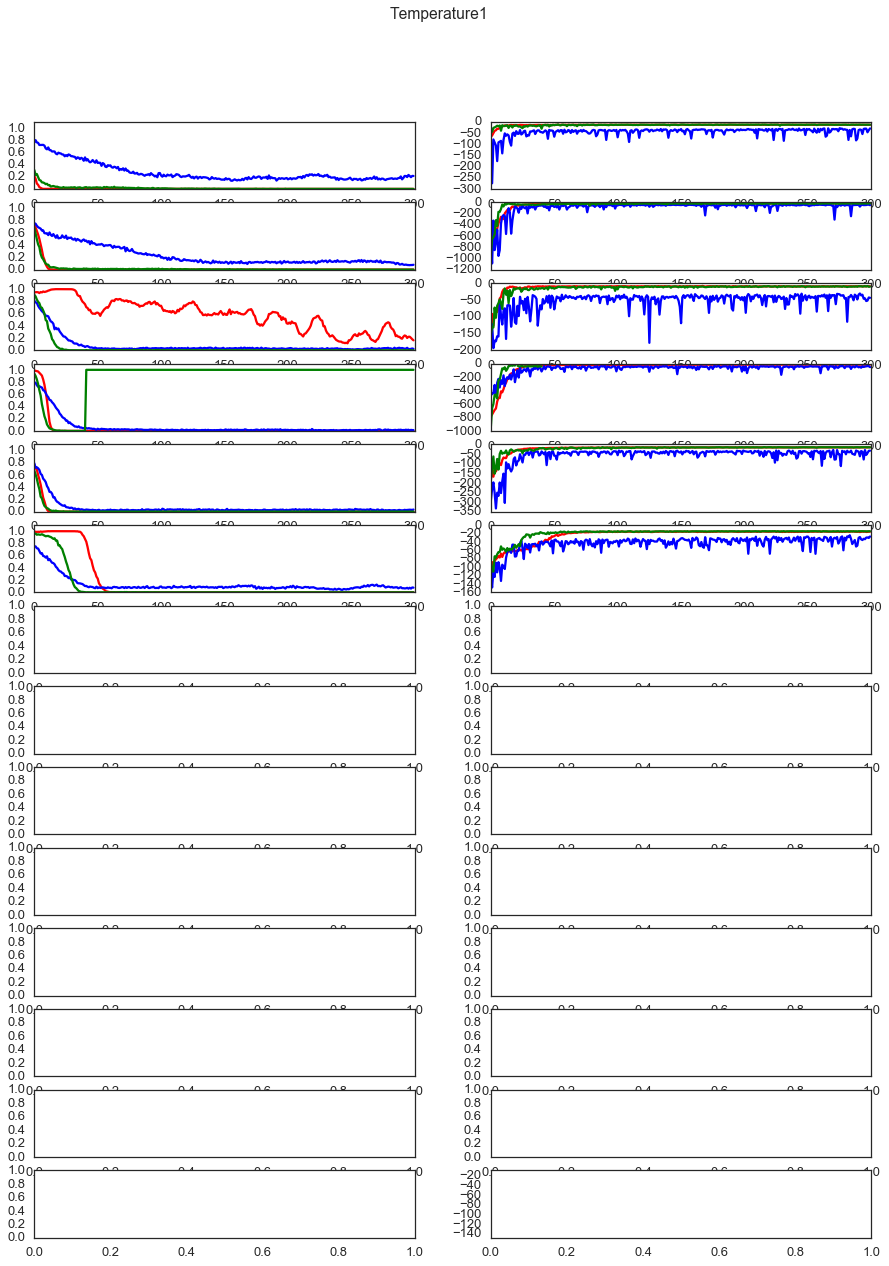

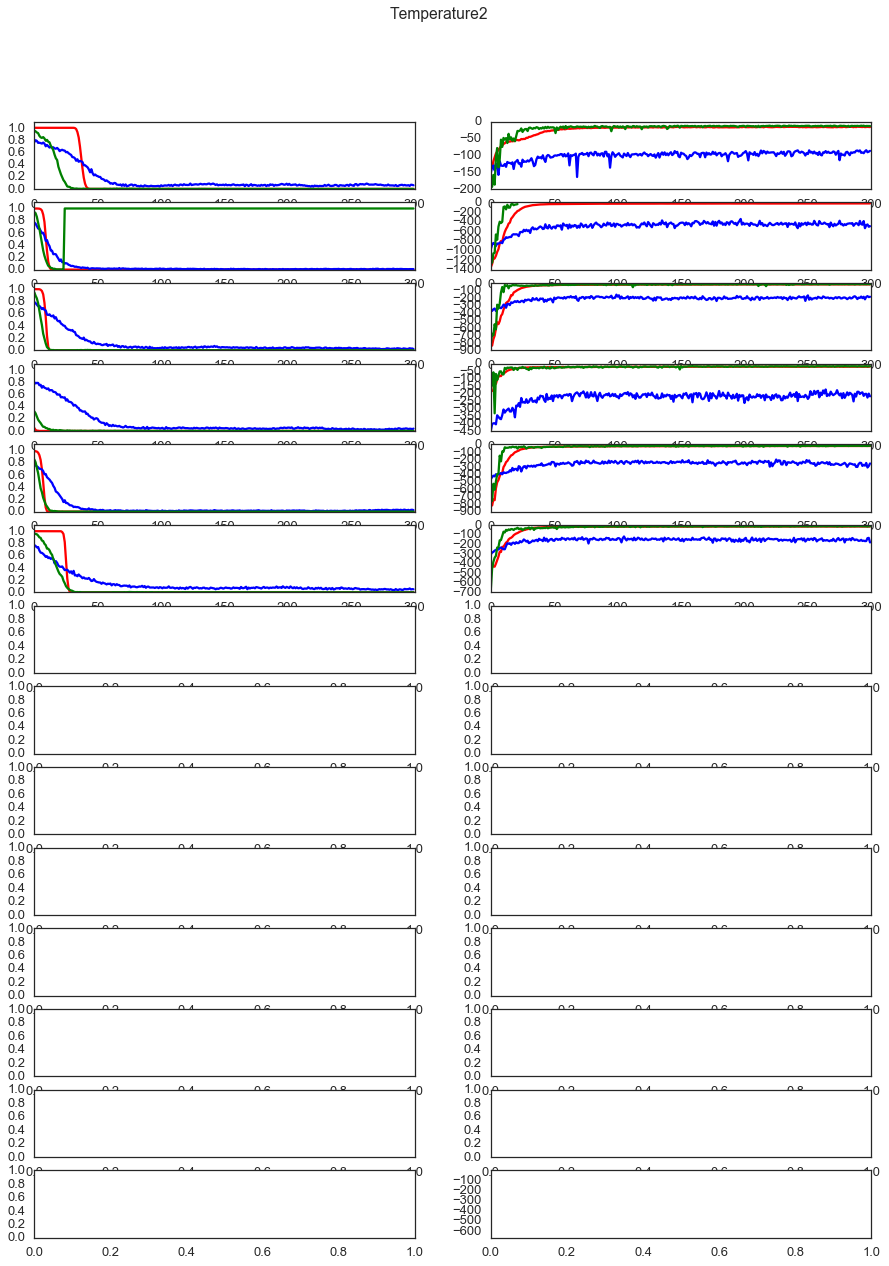

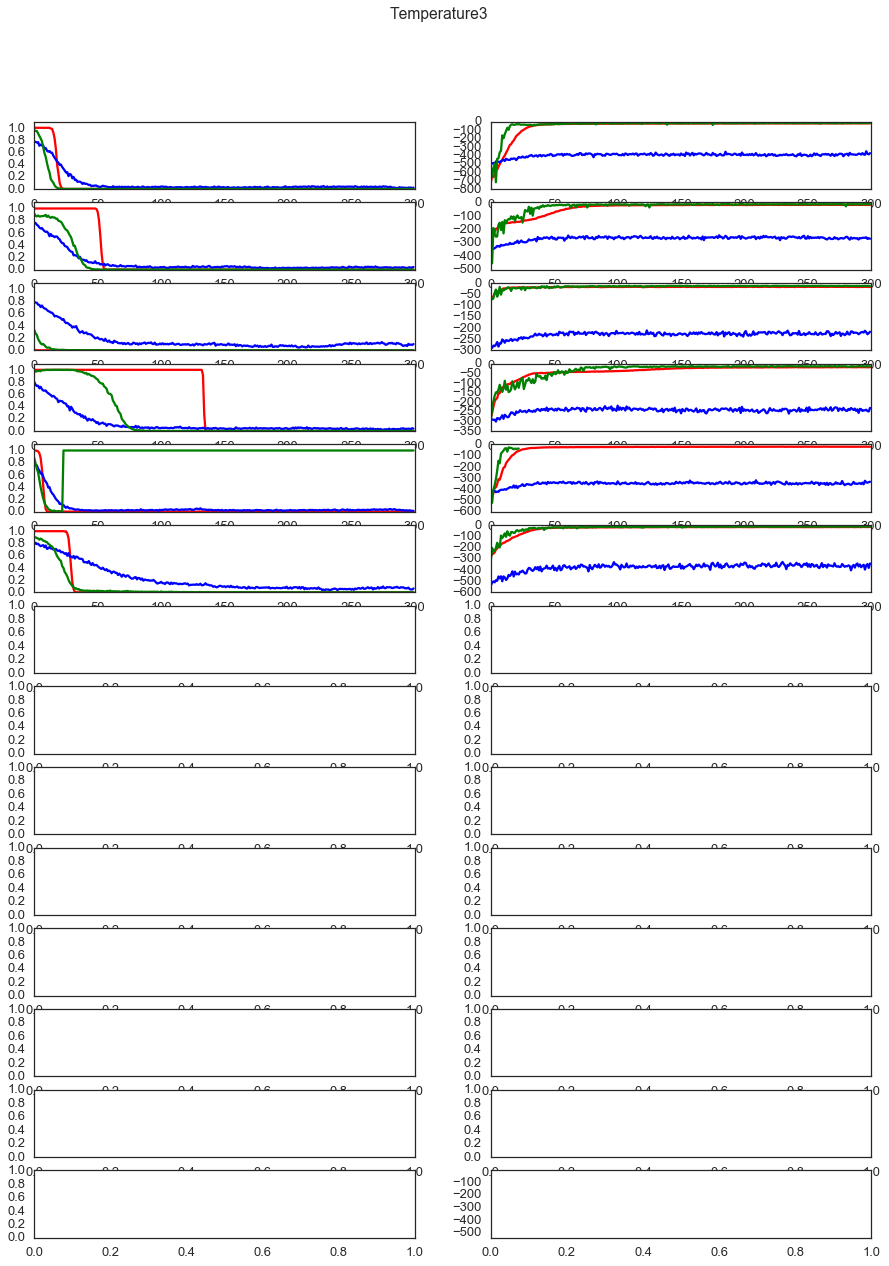

In [276]:

for k in range(4):
    f, ax = plt.subplots(14, 2, sharey=False, figsize=(15, 20))
    #print (maxi,dictionary['log_evidences'][l,k])
    for l in range(6):
        
        ax[l,1].plot(dictionary['elbos'][0][l,k,:].T,'r')
        ax[l,1].plot(dictionary['elbos'][1][l,k,:].T,'b')
        ax[l,1].plot(dictionary['elbos'][2][l,k,:].T,'g')
        mini=min([np.amin(dictionary['elbos'][h][l,k,:]) for h in range(3)])
        maxi =max([np.amax(dictionary['elbos'][h][l,k,:]) for h in range(3)])
        axes = plt.gca()
    
        axes.set_ylim([mini,dictionary['log_evidences'][l,k]])
        ax[l,0].plot(dictionary['dists'][0][l,k,:].T,'r')
        ax[l,0].plot(dictionary['dists'][1][l,k,:].T,'b')
        ax[l,0].plot(dictionary['dists'][2][l,k,:].T,'g')
        ax[l,0].set_ylim([0,1.1])
        f.suptitle('Temperature' + str(k))

In [267]:
#print dictionary['approx_z']
#print 5
#print dictionary['posteriors']
#print dictionary['dists'][2][5,0,:].T
print dictionary['posteriors'][0,3,:]
print np.round(np.hstack((dictionary['approx_z'][0][0,3,:,:],np.reshape(dictionary['elbos'][0][0,3,:],(-1,1))))[100:200,:])
print dictionary['log_evidences'][0,3]
print dictionary['var_params'][0][0,3,-1,:]

[  1.40499368e-263   0.00000000e+000   1.34497945e-242   1.00000000e+000
   5.93063757e-041]
[[   1.    0.    0.    0.    0. -141.]
 [   1.    0.    0.    0.    0. -136.]
 [   1.    0.    0.    0.    0. -129.]
 [   1.    0.    0.    0.    0. -120.]
 [   1.    0.    0.    0.    0. -119.]
 [   0.    0.    0.    0.    1. -124.]
 [   0.    0.    0.    0.    1. -108.]
 [   0.    0.    0.    0.    1. -130.]
 [   0.    0.    0.    0.    1. -125.]
 [   0.    0.    0.    0.    1. -115.]
 [   0.    0.    0.    0.    1. -117.]
 [   0.    0.    0.    0.    1. -115.]
 [   0.    0.    0.    0.    1. -121.]
 [   0.    0.    0.    0.    1. -124.]
 [   0.    0.    0.    0.    1. -105.]
 [   0.    0.    0.    0.    1.  -93.]
 [   0.    0.    0.    0.    1.  -96.]
 [   0.    0.    0.    0.    1.  -90.]
 [   0.    0.    0.    0.    1. -101.]
 [   0.    0.    0.    0.    1. -101.]
 [   0.    0.    0.    0.    1. -100.]
 [   0.    0.    0.    0.    1.  -92.]
 [   0.    0.    0.    0.    1.  -86.]
 [   0.   